# CLOUDMASK Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the CLOUDMASK product created by BOKU. This product contains a binary map (Mask) of cloud and buffered cloud shadows. The product is resampled to the Equi7 Grid, covers an area of 100 km x 100 km with a pixel sampling of 10 m.

The product name in the ACube is `CLOUDMASK_Sentinel_2`. It is composed of single measurement `band_1`.

Relevant links:
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/3.4.2.3.%20Products/
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.2.%20Sentinel-2%20data/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
import xarray
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_cloudmask')
product = 'CLOUDMASK_Sentinel_2'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,instrument,product_type,platform,format,crs,resolution,spatial_dimensions
id,,,,,,,,,
2,CLOUDMASK_Sentinel_2,Cloud mask and buffer derived from SCL.,MSI,BOKU_CLOUDMASK_S2,Sentinel-2,GeoTIFF,"PROJCS[""Azimuthal_Equidistant"",GEOGCS[""GCS_WGS...","[-10, 10]","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

,,aliases,dtype,name,nodata,units
product,measurement,,,,,
CLOUDMASK_Sentinel_2,band_1,"[band_01, Band1, Band_1]",uint8,band_1,255,1


In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2019-05-01', '2019-05-01')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['creation_dt', 'csw_link', 'extent', 'format', 'granule_id', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'platform', 'product_format', 'product_type']
****************************************************************************************************
METADATA
{'creation_dt': '2019-11-07T14:52:27.370463',
 'csw_link': 'https://csw-acube.eodc.eu//?service=CSW&version=3.0.0&request=GetRecordById&id=CLOUDMASK-_SEN2COR_S2A_L2A------_20190501_20190501_EU010M_E052N016T1&elementSetName=full&outputSchema=http://www.isotc211.org/2005/gmd&outputformat=application/xml',
 'extent': {'center_dt': '2019-05-01T00:00:00',
            'coord': {'ll': {'lat': 47.97836637131795,
                             'lon': 15.455732336236059},
                      'lr': {'lat': 48.07479777972179,
                             'lon': 16.787238513505876},
                      

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 1526, y: 2250)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-01
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x        (x) float64 5.963e+05 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
Data variables:
    band_1   (time, y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
Attributes:
    crs:      EPSG:32633

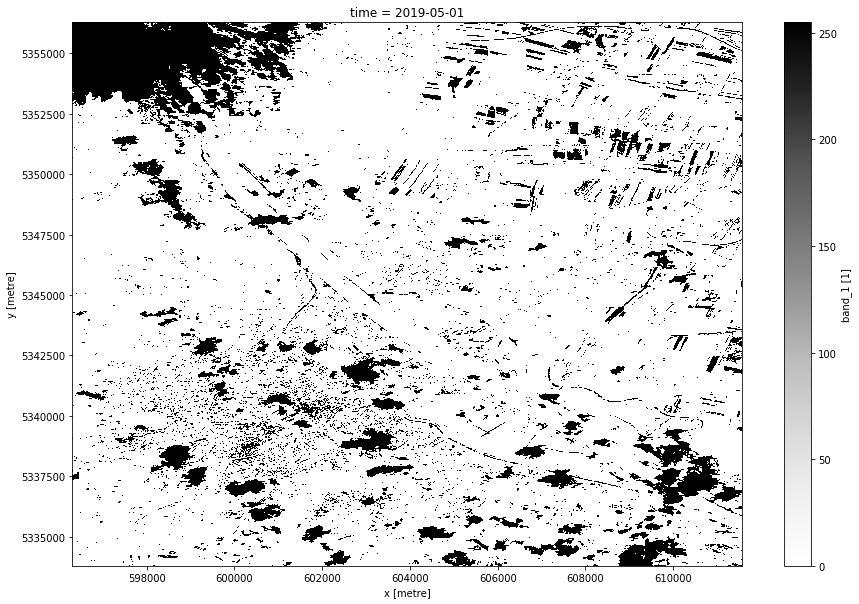

In [7]:
data.band_1.plot(size=10, cmap='Greys')